In [7]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import talib as ta
%matplotlib inline
sns.set_theme()

In [8]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [9]:
from src.utils import get_config, read_file

In [10]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbols

['ETH/USDT',
 'BTC/USDT',
 'BNB/USDT',
 'SOL/USDT',
 'ADA/USDT',
 'AVAX/USDT',
 'LINK/USDT',
 'XRP/USDT',
 'LTC/USDT',
 'UNI/USDT']

In [11]:
symbol = symbols[0]
symbol

'ETH/USDT'

In [12]:
data = read_file.read_raw_training_data(symbol)
data

Reading Training data: ETH !
Successfully read: ETH !


,open,high,low,close,volume
timestamp,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358
...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660


In [13]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [14]:
data['rsi'] = ta.RSI(data['close'], timeperiod=14)
data.head(100)

,open,high,low,close,volume,rsi
timestamp,,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460,NaN
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138,NaN
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000,NaN
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719,NaN
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358,NaN
...,...,...,...,...,...,...
2020-06-12 20:00:00,236.82,238.48,236.53,237.55,31295.07848,44.834515
2020-06-13 00:00:00,237.55,238.00,235.53,235.73,44164.17608,41.522391
2020-06-13 04:00:00,235.69,236.84,234.66,236.60,36537.75476,43.664819


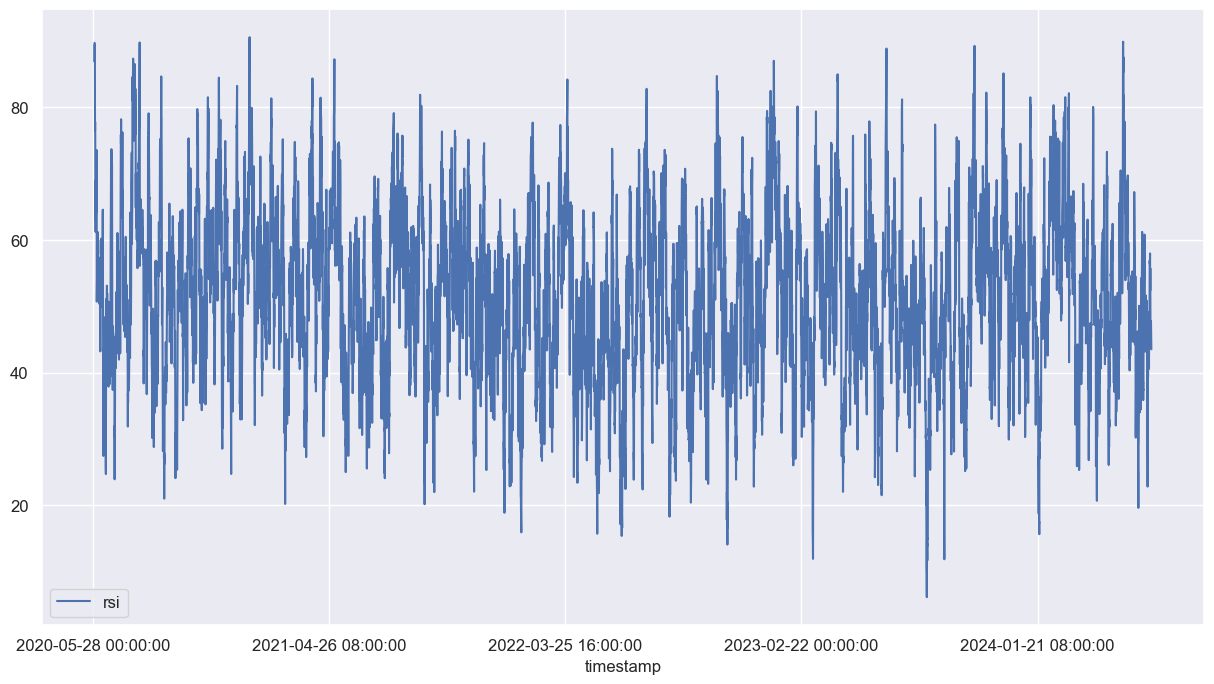

In [15]:
plot_df(data['rsi'])

In [16]:
data['sma-50'] = ta.SMA(data['close'], timeperiod=50)
data['sma-100'] = ta.SMA(data['close'], timeperiod=100)
data['sma-200'] = ta.SMA(data['close'], timeperiod=200)
data['ema-50'] = ta.EMA(data['close'], timeperiod=50)
data['ema-100'] = ta.EMA(data['close'], timeperiod=100)
data['ema-200'] = ta.EMA(data['close'], timeperiod=200)
data

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200
timestamp,,,,,,,,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638


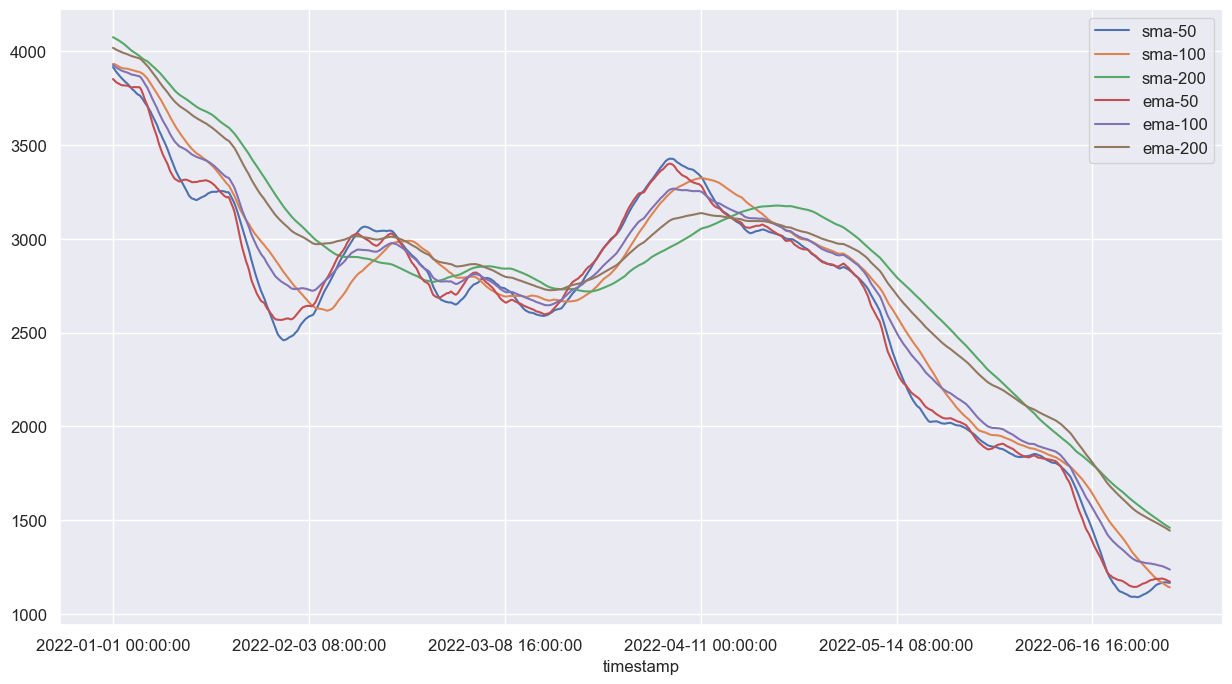

In [17]:
plot_df(data.loc['2022-01-01':'2022-06-30', ['sma-50', 'sma-100', 'sma-200', 'ema-50', 'ema-100', 'ema-200']])

In [18]:
data['atr'] = ta.ATR(data['high'], data['low'], data['close'], timeperiod=14)
data['adx'] = ta.ADX(data['high'], data['low'], data['close'], timeperiod=14)
data

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
timestamp,,,,,,,,,,,,,,
2020-05-28 00:00:00,208.29,208.97,206.23,206.39,57174.58460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 04:00:00,206.36,206.98,204.74,205.32,58091.35138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 08:00:00,205.32,207.80,204.67,207.57,63672.58000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 12:00:00,207.59,214.65,207.35,214.26,206879.94719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-28 16:00:00,214.26,215.58,213.39,214.66,121482.63358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950,47.608675,3428.3040,3474.8772,3616.21060,3431.772075,3478.269080,3502.939085,43.282212,18.399477
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600,47.755645,3426.2890,3473.5916,3613.61495,3430.543758,3476.728108,3501.919293,41.537054,17.366498
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660,46.630594,3424.6814,3471.9366,3611.01800,3429.134984,3475.102205,3500.851638,40.012979,16.556739


In [19]:
data.describe()

,open,high,low,close,volume,rsi,sma-50,sma-100,sma-200,ema-50,ema-100,ema-200,atr,adx
count,8964.000000,8964.000000,8964.000000,8964.000000,8.964000e+03,8950.000000,8915.000000,8865.000000,8765.000000,8915.000000,8865.000000,8765.000000,8950.000000,8937.000000
mean,2037.877713,2061.363606,2012.474413,2038.231184,1.092871e+05,51.568499,2039.453953,2040.467879,2041.887880,2039.377113,2040.282796,2042.128949,48.911831,27.342820
std,1068.400168,1080.838548,1054.845443,1068.320506,9.903009e+04,12.666641,1058.907848,1048.667382,1027.164212,1055.819446,1042.608300,1015.590739,37.443264,11.092652
min,205.320000,206.980000,204.670000,205.320000,1.617488e+02,6.133337,225.965600,229.804500,233.344550,227.426939,229.139636,232.350273,1.931892,7.830293
25%,1343.067500,1361.742500,1327.242500,1343.470000,4.787865e+04,42.877537,1357.944300,1395.765700,1409.678750,1369.952745,1402.605160,1435.849342,20.198379,18.977465
50%,1856.345000,1868.955000,1846.000000,1856.395000,8.066131e+04,51.535761,1858.304800,1851.247200,1846.705650,1856.714781,1854.245348,1856.151502,41.040248,24.767026
75%,2866.450000,2903.735000,2828.740000,2866.670000,1.362554e+05,60.100713,2852.786300,2845.081800,2854.320500,2853.554237,2855.790282,2874.333881,68.913113,33.963294
max,4846.940000,4868.000000,4776.370000,4846.710000,1.531897e+06,90.593453,4686.345600,4563.699700,4433.294550,4636.017489,4534.088693,4323.182337,308.416654,71.684578


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8964 entries, 2020-05-28 00:00:00 to 2024-06-29 20:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     8964 non-null   float64
 1   high     8964 non-null   float64
 2   low      8964 non-null   float64
 3   close    8964 non-null   float64
 4   volume   8964 non-null   float64
 5   rsi      8950 non-null   float64
 6   sma-50   8915 non-null   float64
 7   sma-100  8865 non-null   float64
 8   sma-200  8765 non-null   float64
 9   ema-50   8915 non-null   float64
 10  ema-100  8865 non-null   float64
 11  ema-200  8765 non-null   float64
 12  atr      8950 non-null   float64
 13  adx      8937 non-null   float64
dtypes: float64(14)
memory usage: 1.3+ MB
